In [1332]:
#%matplotlib notebook

# Onderzoeksrapport

**Studenten:** Dennis Gerritsen, Tim Dremmen

**Studentnummers:** 2106973, 1859609

**Docent:** Koen Steeghs

**Course:** Data Science

**Klas:** BD04

## Introductie

Dit onderzoeksrapport dient als groeirapport voor de studenten om aan te kunnen tonen dat ze de
vaardigheden bezitten die tijdens de course van de studenten gevraagd worden. Aan de hand van verschillende
verschillende data science methoden wordt de kennis toegepast op een zelfgekozen dataset.

## Materialen

Voor dit rapport wordt gebruik gemaakt van verschillende python libraries. Onder andere
pandas voor het opzetten van een dataframe en het manipuleren van data. Numpy voor de uitgebreide array functies.
Ook sklearn om de verschillende modellen te kunnen opzetten. En matplotlib om de grafieken te kunnen plotten.

[dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

## Onderzoek

In dit hoofdstuk zijn de uitwerkingen te vinden met algemene informatie per methode en
welke aanpassingen gemaakt moeten worden om het model per methode op te kunnen stellen. Ook is
 er een conclusie verbonden aan de uitgewerkte modellen.

#### Setup

In [1333]:
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")


path = Path("data/houses.csv")

df = pd.read_csv(path)

### Dataset

De gekozen dataset is een huizenverkoop dataset met allerlei relevante informatie te vinden in het bestand data_description.txt. Het voornamelijke doel
van de dataset is op basis van de  81 verschillende kolommen de huizenprijs te voorspellen, buiten dit zijn er natuurlijk een aantal verbanden te vinden die mogelijk in dit
document te voorschijn komen. Hieronder is een overzicht te zien van een de kolommen in de dataset.

In [1334]:
pd.set_option('max_columns', None)
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Preprocessing

Hierin wordt beschreving welke operaties over de dataset worden uitgevoerd voordat we er mee gaan werken.

#### NaN values

Voor alle kolommen in de dataset die een lege waarde bevatten, betekent het dat dit attribuut er niet is. Dus ontbreekt er geen data
en betekent het dat er geen operatie over de NaN waardes hoeft worden uitgevoerd.

In [1335]:
nan_cols = [i for i in df.columns if df[i].isnull().any()]
print(nan_cols)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


#### Categorische waardes

Per methode wordt gekeken of het nodig is om classificaties numeriek of om er een boolean van te maken. Deze omvormingen zijn hier beschreven.

#### Central Air Conditioning

Bij de uitwerking van logistic regression is het nodig om een yes en no value om te zetten in een numerieke boolean value, zodat het toegepast kan worden in het regressiemodel.

In [1336]:
df.CentralAir.replace(('Y', 'N'), (1, 0), inplace=True)
print(df.CentralAir)

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: CentralAir, Length: 1460, dtype: int64


### Multiple Linear Regression

Multiple linear regression is een uitbreiding op de methode linear regression waarbij de uitkomst afhankelijk is van niet een
onafhankelijke variabele, maar meerderen. Een voorbeeld voor het berekenen van multiple linear regression is de tevredenheid van mensen.
Dit is een resultaat dat niet af te leiden valt uit een variabele, en zijn er meerdere invoervariabelen nodig om het resultaat te bepalen.
Een belangrijke eigenschap bij het toepassen van lineaire regressie, is dat de x en y variabelen goed met elkaar moeten correleren, en ook
een lineair patroon moeten hebben wanneer ze geplot worden, anders is het model niet vertrouwbaar genoeg.

### Hypothese

In onze uitwerking gaan we op basis van het woonoppervlakte en de garagegrootte de prijs voorspellen van een huis. Wij denken dat het
oppervlakte een sterke correlatie heeft met de uiteindelijke prijs van het huis in combinatie met de grootte van de garage mits die aanwezig is.

#### Preparatie

Bij linear regression is het belangrijk dat de waardes correleren met het resultaat, in dit geval is dat de huizenprijs.
Als onafhankelijke variabelen hebben we gekozen voor GrLivArea en GarageArea, aangezien we daar een duidelijke correlatie zien
en zijn de waardes in de kolommen niet opgedeeld in groepen, maar zien we dat de waardes meer natuurlijk op de grafiek terecht komen. We hebben gekozen
om een correlatielijst op te stellen op basis van de SalePrice i.p.v. gebruikelijk een matrix te gebruiken aangezien het doel van deze dataset de huizenprijs voorspellen is. En hieronder zijn de correlaties te vinden
en overigens ook de algemene statistische informatie over de SalePrice.

In [1337]:
mlrdf = df
mlrdf.corrwith(mlrdf['SalePrice'])


Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
CentralAir       0.251328
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice   

In [1338]:
mlrdf['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Wat meteen uit de dataset te concluderen valt, is dat er ook huizen zijn met een garage grootte van 0, dit betekent dat er geen garage is. Dus
worden deze waardes er direct uitgehaald, aangezien deze records niks kunnen zeggen over de huizenprijs op basis van de garagegrootte.
Ook is te zien dat het verband vanaf een prijs van 400000 niet echt duidelijk meer loopt, dus is er besloten om alle records van 400000 en hoger
te droppen om hierdoor dus een beter model te maken. Overigens is het ook waar te nemen dat er een aantal uitschieters zijn op de GrLivArea en GarageArea kolommen deze zijn hierbij dus ook eruit gefilterd.


<AxesSubplot:ylabel='Density'>

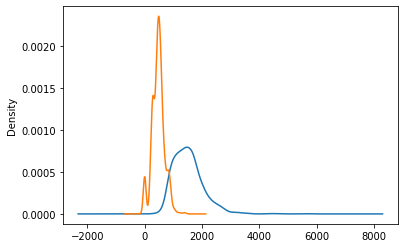

In [1339]:
x1 = mlrdf['GrLivArea']
x2 = mlrdf['GarageArea']
y = mlrdf['SalePrice']

x1.plot.kde()
x2.plot.kde()

Bovenstaand in het blauwe plot is een mooie verdeling te zien van het leefoppervlakte (GrLivArea) en is deze dus goed te gebruiken. Wat natuurlijk opvalt
is de verdeling van de garagegrootte (GarageArea) deze loopt niet soepel. Het eerste punt is links waarbij die bij de 0 oploopt en dan daalt. Dit is te verklaren dat alle huizen
met een garagegrootte van 0 dus geen garage hebben en alle garages een bepaalde grootte moeten hebben om te kunnen functioneren als garage, dit punt is te zien bij de stijging. De andere punten zijn voornamelijk
clusters van veelgebruikte garagegroottes, ondanks dit niet de meest nette verdeling is, denken wij dat het prima is om deze kolom mee te nemen in onze model, omdat dit in de praktijk immers ook kan voorkomen.


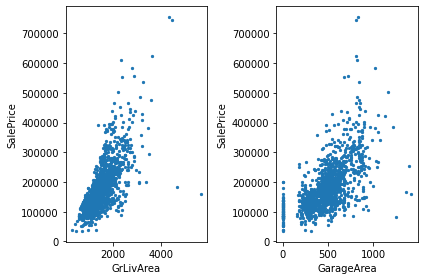

In [1340]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(x1, y, s=5)
ax1.set(xlabel='GrLivArea', ylabel='SalePrice')

ax2.scatter(x2, y, s=5)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
ax2.set(xlabel='GarageArea', ylabel='SalePrice')
fig.tight_layout()
plt.show()

De data wordt op basis van de eerder benoemde waarnemingen gefiltreerd. En hierdoor is er nu een duidelijk lineair verband waar te nemen.


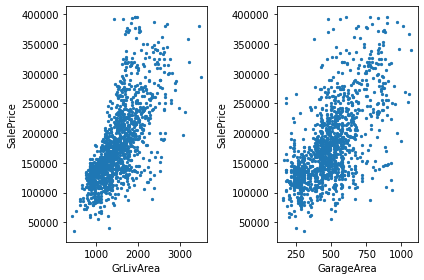

In [1341]:
mlrdf = mlrdf[mlrdf.SalePrice < 400000]
mlrdf = mlrdf[mlrdf.GarageArea > 0]
mlrdf = mlrdf[mlrdf.GarageArea < 1100]
mlrdf = mlrdf[mlrdf.GrLivArea < 4000]


x1 = mlrdf['GrLivArea']
x2 = mlrdf['GarageArea']
y = mlrdf['SalePrice']

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(x1, y, s=5)
ax1.set(xlabel='GrLivArea', ylabel='SalePrice')

ax2.scatter(x2, y, s=5)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
ax2.set(xlabel='GarageArea', ylabel='SalePrice')
fig.tight_layout()
plt.show()

#### Modelleren

Op basis van de huidige waardes kan nu een model worden opgesteld en is een r2 score van
0,59... af te lezen.


In [1342]:
# Assign X and Y axis
X = mlrdf[['GarageArea', 'GrLivArea']]
y = mlrdf['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Coefficient:")
print(regressor.coef_)
print("Intercept")
print(regressor.intercept_)
print("R2")
print(r2_score(y_test, y_pred))


Coefficient:
[139.37139979  66.95627868]
Intercept
8242.242665726022
R2
0.591085154065552


#### Visualiseren

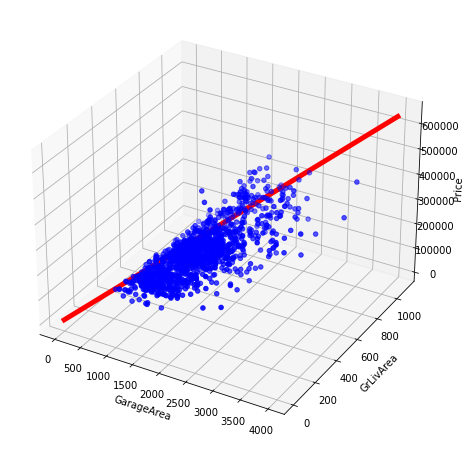

In [1343]:
maxGrLivArea = 4000
maxGarageArea = 1100

y_predLineStart = [[0, 0]]
y_predLineEnd = [[4000, 1100]]
yStart = regressor.predict(y_predLineStart)
yEnd = regressor.predict(y_predLineEnd)

x1Plot = [0,4000]
x2Plot = [0, 1100]
yPlot = np.array([yStart, yEnd]).flatten().tolist()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o')
ax.plot3D(x1Plot, x2Plot, yPlot, color='red', linewidth=5)
# set your labels
ax.set_xlabel('GarageArea')
ax.set_ylabel('GrLivArea')
ax.set_zlabel('Price')
plt.show()


#### Conclusie

Het multiple linear regression model is niet perfect aangezien er niet naar de uiterste mogelijkheid is gekeken om de huizenprijs te voorspellen op basis van zoveel mogelijk variabelen.
 Echter vinden wij de R2 score van 0,591.. een goed resultaat aangezien dit op basis van maar 2 van de velen variabelen is. Ook is het te beargumenteren dat een huizenprijs nooit heel accuraat voorspeld kan worden aangezien er verschillende factoren van buitenaf een invloed kunnen hebben.
  Dus het model is niet perfect, maar geeft zeker een goede indicatie van de huizenprijs van een huis met een garage.

### Logaritmic Regression

Logistic regression is een regressiemethode waarvan op basis een of meerdere onafhankelijke variabelen een afhankelijke variabelen kan worden voorspeld.
 Vaak is deze afhankelijke variabele een boolean waarde of zijn dit classificaties die omgezet kunnen worden tot numerieke waardes. Het is kenmerkend van een logaritmic regressionmodel dat de onafhankelijke variabelen op een logaritmische vorm op de grafiek staan.

#### Hypothese

Op basis van de grootte van het huis gaan wij voorspellen of een huis in bezit is van Central Air Conditioning. Wij denken dat de grootte van het huis
een hele grote invloed heeft op het feit dat het huis Central Air Conditioning heeft omdat wij denken dat het een soort van luxe toevoeging is die lang niet iedereen in bezit heeft.

#### Preparatie

Net zoals bij multiple linear regression is het belangrijk dat er een mate van correlatie tussen de X waarde(s) en y waarde zitten.
Hier is een goede correlatie te zien met de leeftijd met het huis en zal deze worden meegenomen in de bouw van het model. Ook hierin dekt een correlatielijst voldoende
aangezien de y waarde de enige boolean is en het beste geschikt is voor het model, dus is het opstellen van een matrix niet nodig.

1    1365
0      95
Name: CentralAir, dtype: int64


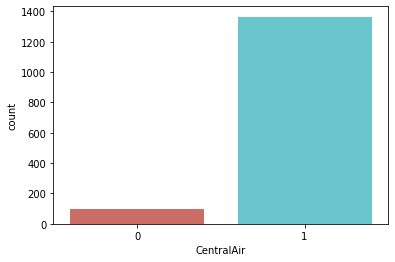

percentage of no CentralAir is 6.506849315068493
percentage of CentralAir 93.4931506849315


<Figure size 432x288 with 0 Axes>

In [1344]:
lrdf = df
lrdf.corrwith(lrdf['CentralAir'])
lrdf['CentralAir'].describe()
print(df['CentralAir'].value_counts())
sns.countplot(x='CentralAir' ,data=df, palette='hls')
plt.show()
plt.savefig('countplot')

count_no_sub = len(df[df['CentralAir']==0])
count_sub = len(df[df['CentralAir']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no CentralAir is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of CentralAir", pct_of_sub*100)

Hier boven is de distributie van waardes te zien en dan zie je dat de meeste huizen een Central Air unit hebben in de dataset. Overigens is het zoverre
niet nodig om data te filtreren bij de uitvoer van deze methode aangezien er geen garbage in gaat.


<AxesSubplot:ylabel='Density'>

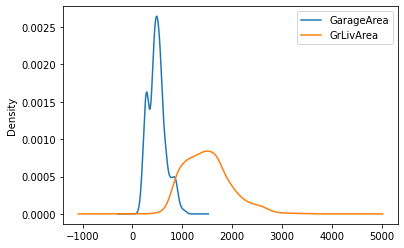

In [1345]:
columns = ['YearBuilt']
x = df[columns]
y = lrdf['CentralAir']

X.plot.kde()

Zo te zien wijkt de data af van de standaardverdeling echter is het te verklaren door het feit dat door de bevolkingsgroei huizen meer gebouwd worden dan gesloopt. Ook kan een crisis of een oorlog invloed hebben gehad op de daling van de sales van huizen.
Met deze factoren in het achterhoofd is het alsnog mogelijk om met deze data te werken, aangezien het verklaarbare redenen zijn waarom er een afwijking is.

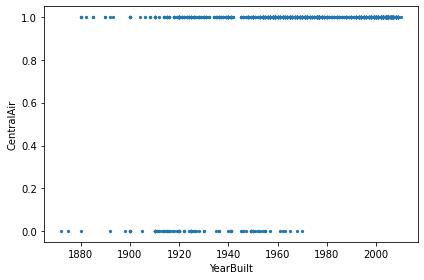

In [1346]:
fig, ax = plt.subplots()

ax.scatter(x, y, s=5)
ax.set(xlabel='YearBuilt', ylabel='CentralAir')

fig.tight_layout()
plt.show()

De grafiek geeft direct de kenmerken weer van een logaritmisch model aangezien je kan zien dat de meeste punten waarbij er een Central Air unit aanwezig rechtsin liggen.
 En waarbij er geen is vooral meer linksmidden liggen. Wel zie je direct een aantal afwijkingen linksbovenin, dit kan bijvoorbeeld zijn doordat er in de latere jaren nog Central Air units zijn bijgebouwd.

#### Modelleren

Op basis van de huidige waardes kan nu een model worden opgesteld en is een accuracy van 0.91 af te lezen.

[[  0  47]
 [  0 537]]
Accuracy: 0.9195205479452054


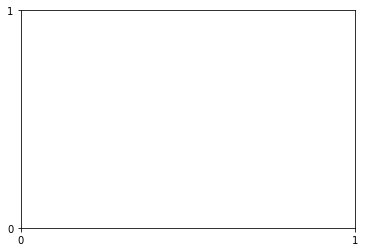

In [1347]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

#
y_pred=logreg.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#### Visualiseren

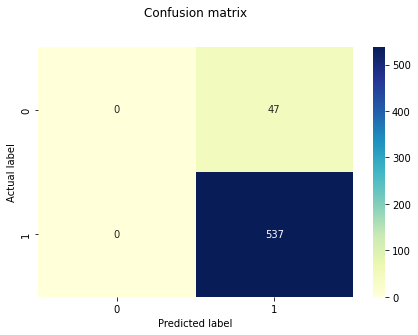

In [1348]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### Conclusie

Het logistic regression model is minimaal, maar er is op basis van de YearBuilt kolom een goede voorspelling te maken of een huis nou een central air unit heeft of niet. Een accuracy van 0.915.... waarbij het geen ramp is of een voorspelling fout is, is best goed, omdat er geen grote consequenties aan zitten als het fout is. Dus kortom, het is niet perfect maar er is een hele goede voorspelling te maken op basis van de leeftijd van een huis.

### Decision Trees

Een decision tree is een boom die op basis van beslissingen waardes sorteert om tot een zo puur mogelijk resultaat te komen van de target value. Deze boom wordt bepaald door
met een aantal features steeds te kijken waar een zo puur mogelijke splitsing te maken is. Dit proces is zinvol om iteratief door te blijven voeren totdat er de puurheidswaarde hoger wordt dan de vorige
puurheidswaarde (in ons geval is dit de Gini Index).


### Hypothese

Zoals bij multiple linear regression gaan wij op basis van het woonoppervlakte en de garagegrootte de SalePrice voorspellen. Wat we anders gaan doen is dat we de outliers mee nemen.
Wij denken dat het decision tree model een redelijke voorspelling kan doen op de huizenprijs, de outliers zullen waarschijnlijk veel beter behandeld kunnen worden dan bij een lineair model, maar
het lineair model wel beter zal presteren in deze situatie.

### Preparatie

Idealiter zou een decision tree model het beste passen op een model waarbij de punten op de plot willekeurig verspreid zijn. In dit geval
gaan we op basis van dezelfde features van [Multiple Linear Regression](#Multiple-Linear-Regression) ook dezelfde target te voorspellen.


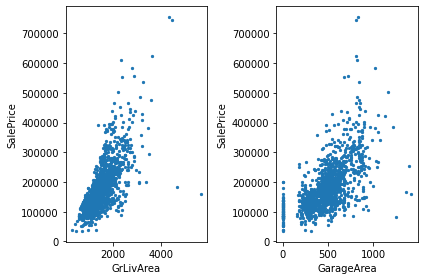

In [1349]:
dtrdf = df

x1 = dtrdf['GrLivArea']
x2 = dtrdf['GarageArea']
y = dtrdf['SalePrice']

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(x1, y, s=5)
ax1.set(xlabel='GrLivArea', ylabel='SalePrice')

ax2.scatter(x2, y, s=5)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
ax2.set(xlabel='GarageArea', ylabel='SalePrice')
fig.tight_layout()
plt.show()


Kijkend naar de plot zie je dat nu wel de uitschieters zijn meegenomen en ook de huizen zonder garages, en deze kunnen wij nu laten zitten, omdat ze met de decision tree er makkelijk
uit te halen zijn, zonder dat ze het model teveel vervuilen. Dus wordt geen data gemanipuleerd voor deze methode.

#### Modelleren

In [1350]:
# Assign X and Y axis
X = dtrdf[['GrLivArea', 'GarageArea']]
y = dtrdf['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

treeRegressor = DecisionTreeRegressor(random_state= 0)
treeRegressor.fit(X_train, y_train)
y_pred = treeRegressor.predict(X_test)

Ondanks dat er nu een model staat, zal de boom nog gepruned moeten worden, om overfitting te voorkomen. De boom is nu gesplitst tot volledige elementaire waarden, en dit betekent dat
het model zover mogelijk is aangepast op de testset. En dit wil je natuurlijk niet voor een voorspellend model.

#### Pruning

De alphas zullen gezocht worden van het model en wordt er gekeken wanneer de alphas van de test en train set ongeveer in het midden zitten vergeleken met de accuracy.

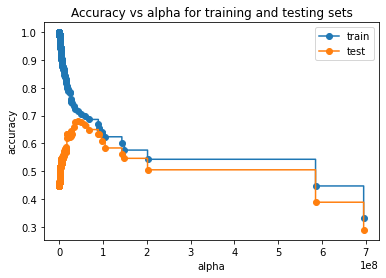

In [1351]:
path = treeRegressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]
regressor_dts = []
for ccp_alpha in ccp_alphas:
    treeRegressor = DecisionTreeRegressor(random_state= 0,ccp_alpha=ccp_alpha)
    treeRegressor.fit(X_train, y_train)
    regressor_dts.append(treeRegressor)


train_scores = [regressor.score(X_train, y_train) for regressor in regressor_dts]
test_scores = [regressor.score(X_test, y_test) for regressor in regressor_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

Hieruit is af te lezen dat een alpha van 0.6 ideaal zou zijn voor het model.

In [1352]:


treeRegressor = DecisionTreeRegressor( ccp_alpha=0.6)
treeRegressor.fit(X_train,y_train)
pred=treeRegressor.predict(X_test)
print("Post Pruning: ", r2_score(y_test, pred))

Post Pruning:  0.42854968745378397




#### Visualiseren

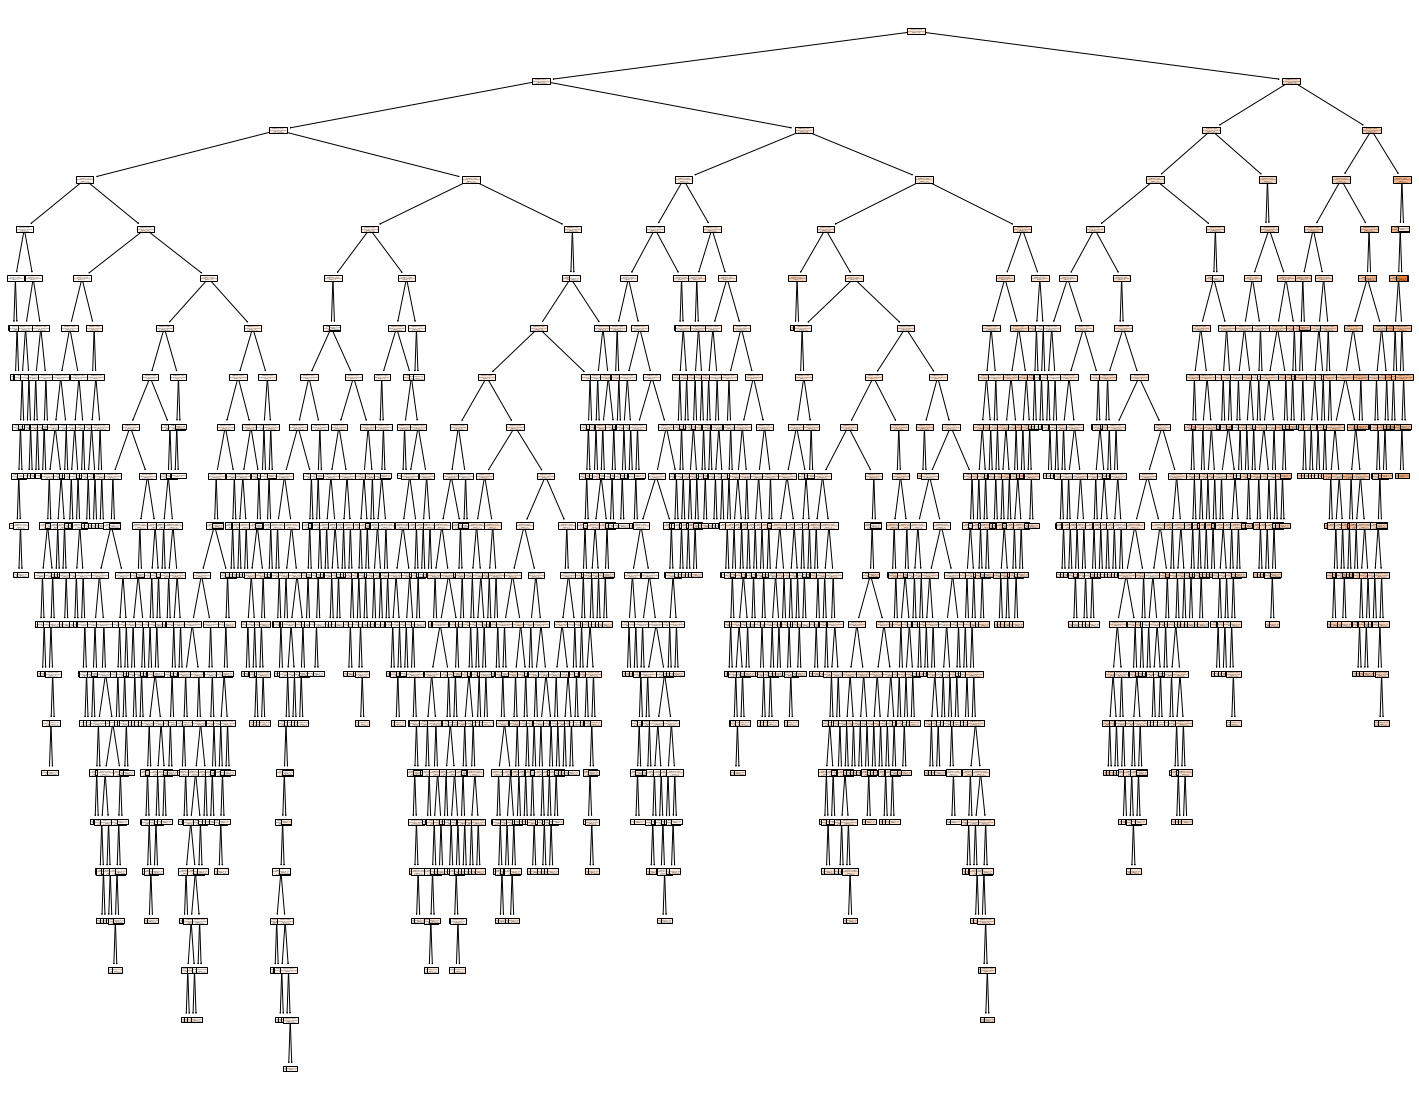

In [1353]:
target = list(y.unique())
feature_names = list(X.columns)
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(treeRegressor,
                   feature_names=feature_names,
                   class_names=target,
                   filled=True)

fig.savefig(fname="decision_tree.png")


### Random Forests

## Discussie

## Conclusie

## Aanbevelingen

## Literatuurlijst